In [170]:
#Data import using Numpy

import numpy as np
import csv
from sklearn.preprocessing import StandardScaler


data_dir = "data/"
file_name = data_dir + "BasicDefaultTypeEMG.csv"


reader = csv.reader(open(file_name, "rb"), delimiter=",")
x = list(reader)
result = np.array(x[1:])




In [174]:
#Number of rows that is going to be processed
#Number of each defined for each classificatinon
print result.shape
emg_pods = result[33142:,1:9].astype('float64')
grips_data = result[33142:,-1]
grips_type = np.unique(grips_data)


for grip in grips_type:
    print("%s  Rows  are %d" % (grip, len(grips_data[grips_data ==grip])))


(120133, 19)
The Continental Grip  (Bevel #2)  Rows  are 21243
The Eastern Forehand Grip (Bevel #3)  Rows  are 18314
The Semi-Western Forehand Grip (Bevel #3)  Rows  are 22999
The Western Forehand Grip (Bevel #5)  Rows  are 24435


In [185]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(emg_pods)
print scaled_data


scaled_data = scaler.fit(emg_pods)
print scaled_data.transform(emg_pods)



[[-0.67 -1.1  -0.98 ... -0.02 -0.67 -0.7 ]
 [ 0.59  0.58  0.11 ...  0.35  1.3   0.16]
 [ 1.05  1.51  0.65 ... -0.02 -0.42  0.22]
 ...
 [-0.21 -0.34  0.43 ... -0.02  0.15  0.28]
 [ 0.85  0.33  1.84 ... -0.21  0.64  0.45]
 [ 0.65 -0.34  0.65 ...  1.08  0.64 -0.01]]
[[-0.67 -1.1  -0.98 ... -0.02 -0.67 -0.7 ]
 [ 0.59  0.58  0.11 ...  0.35  1.3   0.16]
 [ 1.05  1.51  0.65 ... -0.02 -0.42  0.22]
 ...
 [-0.21 -0.34  0.43 ... -0.02  0.15  0.28]
 [ 0.85  0.33  1.84 ... -0.21  0.64  0.45]
 [ 0.65 -0.34  0.65 ...  1.08  0.64 -0.01]]


 sd
[15.01 13.03 10.5   9.36  4.12  5.03 10.95 17.72]
mean
[-0.84 -0.87 -0.98 -0.92 -1.05 -0.85 -0.81 -0.77]
 sd
[16.28 15.55  8.77 12.97  5.72  5.49 11.89 23.8 ]
mean
[-0.83 -0.94 -0.99 -0.91 -1.13 -0.85 -0.81 -0.75]
 sd
[13.21  7.82  8.65  8.66  3.82  5.23 12.66 13.69]
mean
[-0.85 -0.95 -1.01 -0.93 -1.03 -0.88 -0.82 -0.82]
 sd
[15.95 10.66  8.86  8.39  4.63  5.88 12.99 13.83]
mean
[-0.85 -0.93 -0.99 -0.92 -1.01 -0.91 -0.84 -0.89]


IndexError: index 4 is out of bounds for axis 0 with size 4

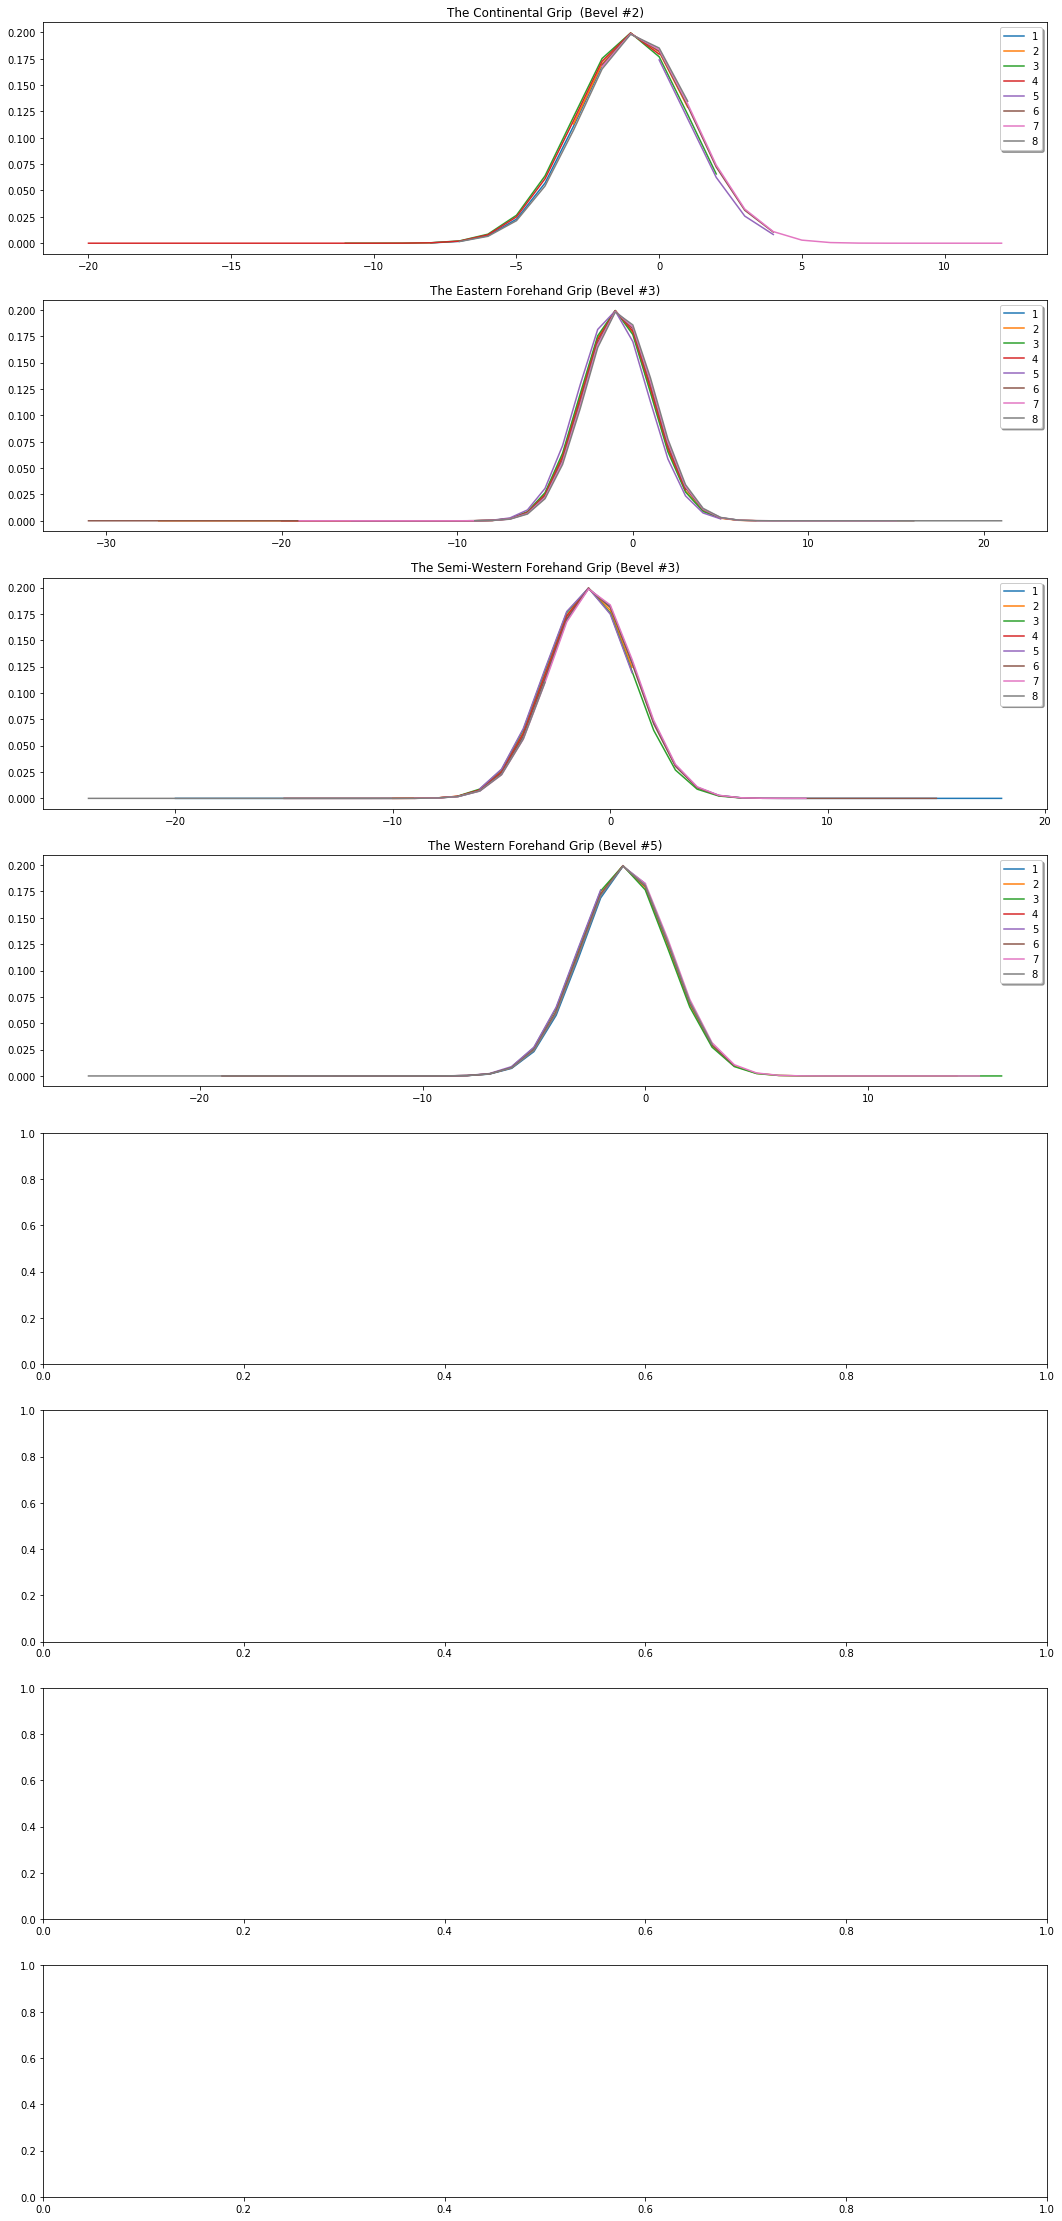

In [179]:



import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

grip_count = 8
figs, axs = plt.subplots(nrows=grip_count, ncols=1, figsize=(18,40))




for type_id in range(grip_count):

    t = emg_pods[grips_data == grips_type[type_id]] #semi western
    sd = np.std(t, axis=0)
    print " sd"
    print sd
    mean = np.mean(t, axis=0)
    print "mean"
    print mean

    # Mean = 0, SD = 2.
    for i in range(8):
        x_axis = np.arange(np.min(t[:][i]), np.max(t[:][i]), 1)
        axs[type_id].plot(x_axis, norm.pdf(x_axis,mean[i], 2), label = "pod" + str(i))

    axs[type_id].legend('12345678',shadow=True, fancybox=True, loc="upper right");
    axs[type_id].set_title(grips_type[type_id] )





In [156]:
#Data Preprossing
#removing extra coloumns
# onehot encoding - label classifier

from sklearn.preprocessing import OneHotEncoder,LabelEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(grips_data)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y_labels = onehot_encoder.fit_transform(integer_encoded)


print(Y_labels[1000:1001])
print(Y_labels[10000:10001])
print(Y_labels[19000:19001])
print(Y_labels[29000:29001])

#prepare training-set, test-set, valid-set.


[[0. 0. 0. 1.]]
[[0. 0. 1. 0.]]
[[0. 1. 0. 0.]]
[[1. 0. 0. 0.]]


In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(emg_pods, Y_labels,  test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)
print X_train.shape
print X_test.shape
print X_val.shape

(60893, 8)
(13049, 8)
(13049, 8)


In [158]:
#Create MultiLayer Perceptron Network


from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, LeakyReLU
from keras.models import Sequential


model = Sequential()
model.add(Dense(128, input_shape=(8,), activation = 'relu', kernel_initializer='truncated_normal'))
model.add(Dropout(.5))
model.add(Dense(len(grips_type), activation='softmax', kernel_initializer='truncated_normal'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               1152      
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 516       
Total params: 1,668
Trainable params: 1,668
Non-trainable params: 0
_________________________________________________________________


In [159]:
#Test MultiLayer Network
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [160]:


model.fit(X_train, y_train, epochs=10, batch_size=20, validation_data=(X_val, y_val),verbose=1)

Train on 60893 samples, validate on 13049 samples
Epoch 1/10
60893/60893 [==============================] - 6s 96us/step - loss: 1.3496 - acc: 0.3317 - val_loss: 1.3167 - val_acc: 0.3512
Epoch 2/10
60893/60893 [==============================] - 5s 86us/step - loss: 1.3370 - acc: 0.3346 - val_loss: 1.3157 - val_acc: 0.3565
Epoch 3/10
60893/60893 [==============================] - 5s 90us/step - loss: 1.3349 - acc: 0.3427 - val_loss: 1.3167 - val_acc: 0.3665
Epoch 4/10
60893/60893 [==============================] - 6s 91us/step - loss: 1.3345 - acc: 0.3454 - val_loss: 1.3186 - val_acc: 0.3567
Epoch 5/10
60893/60893 [==============================] - 5s 89us/step - loss: 1.3338 - acc: 0.3484 - val_loss: 1.3152 - val_acc: 0.3662
Epoch 6/10
60893/60893 [==============================] - 5s 89us/step - loss: 1.3352 - acc: 0.3467 - val_loss: 1.3206 - val_acc: 0.3541
Epoch 7/10
60893/60893 [==============================] - 6s 91us/step - loss: 1.3335 - acc: 0.3494 - val_loss: 1.3179 - val_acc

In [161]:
model_prediction = [np.argmax(model.predict(np.expand_dims(test_vector, axis=0))) for test_vector in X_test]

# report test accuracy
test_accuracy = 100*np.sum(np.array(model_prediction)==np.argmax(y_test, axis=1))/len(model_prediction)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 36.0000%


In [121]:
print model_prediction[1:100]

[7, 4, 1, 3, 5, 5, 1, 4, 6, 3, 5, 5, 0, 3, 5, 4, 4, 3, 4, 6, 5, 5, 1, 3, 6, 1, 5, 6, 7, 4, 6, 0, 5, 5, 0, 3, 7, 5, 7, 5, 3, 5, 3, 6, 7, 5, 0, 5, 4, 6, 3, 0, 5, 0, 6, 0, 1, 7, 4, 0, 5, 4, 4, 5, 5, 5, 0, 1, 7, 5, 3, 3, 3, 4, 1, 5, 3, 1, 1, 0, 5, 3, 0, 7, 4, 3, 4, 0, 4, 5, 6, 0, 3, 5, 6, 4, 4, 0, 4]


In [122]:
print("shafo")

shafo


[[ 2  2  2  1]
 [ 3  7  2  3]
 [ 4  6 11  4]
 [14  7 14 17]]
Normalized confusion matrix
[[0.29 0.29 0.29 0.14]
 [0.2  0.47 0.13 0.2 ]
 [0.16 0.24 0.44 0.16]
 [0.27 0.13 0.27 0.33]]
Normalized confusion matrix


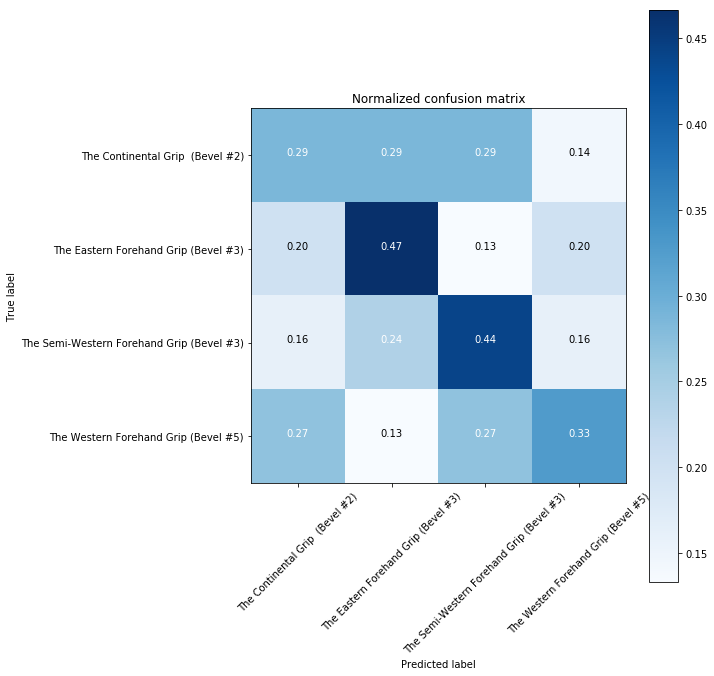

In [162]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix


## we need a better way analyse the confusion matrix for 133 labels.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
test_targets_result = np.argmax(y_test, axis=1)
cnf_matrix = confusion_matrix(model_prediction[1:100], test_targets_result[1:100])
np.set_printoptions(precision=2)
print cnf_matrix

cm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
print("Normalized confusion matrix")
print cm
# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=grip_types,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=grips_type, normalize=True,
                      title='Normalized confusion matrix')

#plt.show()

In [163]:
##testing live data 
file_name = data_dir + "test_continental.csv"


reader = csv.reader(open(file_name, "rb"), delimiter=",")
x = list(reader)
emg_pods_test = np.array(x[1:])[:,1:9].astype('float32')

new_model_prediction = [np.argmax(model.predict(np.expand_dims(test_vector, axis=0))) for test_vector in emg_pods_test]





In [164]:
print new_model_prediction
from collections import Counter
counter = Counter(new_model_prediction).most_common(5)
print (counter)
print(grips_type[0])

[1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 1, 0, 3, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 0, 3, 3, 2, 2, 2, 3, 0, 3, 3, 3, 1, 3, 3, 1, 3, 3, 0, 3, 

In [167]:
##testing live data 
file_name = data_dir + "test_semiwesternfore.csv"


reader = csv.reader(open(file_name, "rb"), delimiter=",")
x = list(reader)
emg_pods_test = np.array(x[1:])[:,1:9].astype('float32')

new_model_prediction = [np.argmax(model.predict(np.expand_dims(test_vector, axis=0))) for test_vector in emg_pods_test]
print new_model_prediction
from collections import Counter
counter = Counter(new_model_prediction).most_common(5)
print (counter)
print(grips_type[counter[0][0]])


[3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 

In [165]:


##testing live data 
file_name = data_dir + "test_eastfore.csv"


reader = csv.reader(open(file_name, "rb"), delimiter=",")
x = list(reader)
emg_pods_test = np.array(x[1:])[:,1:9].astype('float32')

new_model_prediction = [np.argmax(model.predict(np.expand_dims(test_vector, axis=0))) for test_vector in emg_pods_test]
print new_model_prediction
from collections import Counter
counter = Counter(new_model_prediction).most_common(5)
print (counter)
print(grips_type[counter[0][0]])





[2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 

In [166]:

##testing live data 
file_name = data_dir + "test_westernfore.csv"


reader = csv.reader(open(file_name, "rb"), delimiter=",")
x = list(reader)
emg_pods_test = np.array(x[1:])[:,1:9].astype('float32')

new_model_prediction = [np.argmax(model.predict(np.expand_dims(test_vector, axis=0))) for test_vector in emg_pods_test]
print new_model_prediction
from collections import Counter
counter = Counter(new_model_prediction).most_common(5)
print (counter)
print(grips_type[counter[0][0]])

[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 